GRIP : The Sparks Foundation

Data Science and Business Analytics Internship October 2022

Task 3-Exploratory Data Analysis - Retail

Author-Yeshwin Shaaradha N

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [2]:
data=pd.read_csv("SampleSuperstore.csv")

Summrizing the dataset

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [8]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [9]:
data.drop(['Country','Postal Code'], axis=1, inplace=True)

In [10]:
data.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [11]:
data

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [12]:
data["Sales"].sum()

2297200.8603000003

In [13]:
data["Profit"].sum()

286397.0217

In [14]:
data.shape

(9994, 11)

In [15]:
data.duplicated().sum()

50

In [16]:
data.drop_duplicates().sum()

Ship Mode       Second ClassSecond ClassSecond ClassStandard C...
Segment         ConsumerConsumerCorporateConsumerConsumerConsu...
City            HendersonHendersonLos AngelesFort LauderdaleFo...
State           KentuckyKentuckyCaliforniaFloridaFloridaCalifo...
Region          SouthSouthWestSouthSouthWestWestWestWestWestWe...
Category        FurnitureFurnitureOffice SuppliesFurnitureOffi...
Sub-Category    BookcasesChairsLabelsTablesStorageFurnishingsA...
Sales                                                2294599.3773
Quantity                                                    37728
Discount                                                  1555.64
Profit                                                286097.5579
dtype: object

In [17]:
data.drop_duplicates(inplace=True)

In [18]:
data.duplicated().sum()

0

Data Visualization

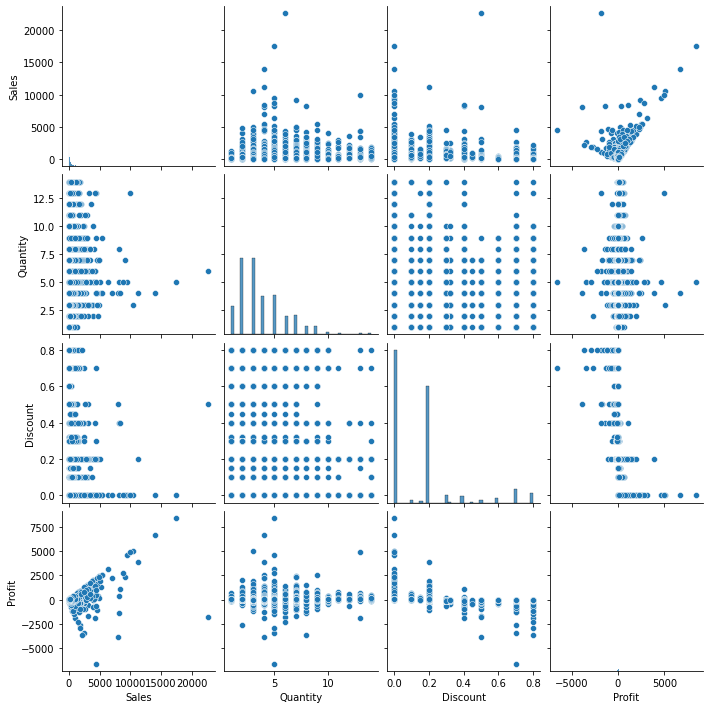

In [19]:
sns.pairplot(data)

Finding the correlation

In [20]:
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200469,-0.028625,0.479078
Quantity,0.200469,1.000000,0.008307,0.066089
Discount,-0.028625,0.008307,1.000000,-0.219939
Profit,0.479078,0.066089,-0.219939,1.000000


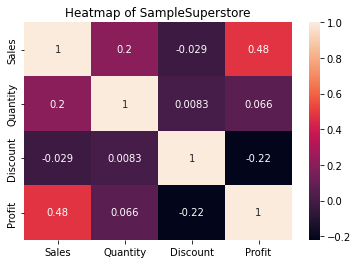

In [21]:
sns.heatmap(data.corr(), annot=True)
plt.title("Heatmap of SampleSuperstore")
plt.show()

In [22]:
data['Ship Mode'].value_counts()

Standard Class    5930
Second Class      1941
First Class       1531
Same Day           542
Name: Ship Mode, dtype: int64

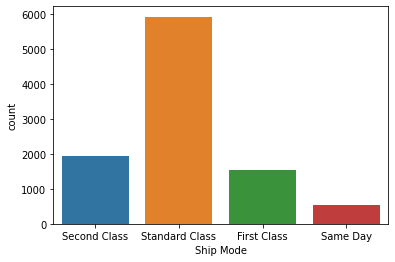

In [23]:
sns.countplot(x=data['Ship Mode'])

In [24]:
ps=data.groupby("Ship Mode")[["Profit","Sales"]].sum()
ps

,Profit,Sales
Ship Mode,,
First Class,48910.4477,3.512746e+05
Same Day,15871.8869,1.283217e+05
Second Class,57425.5716,4.591240e+05
Standard Class,163889.6517,1.355879e+06


Text(0, 0.5, 'Profit and Sales')

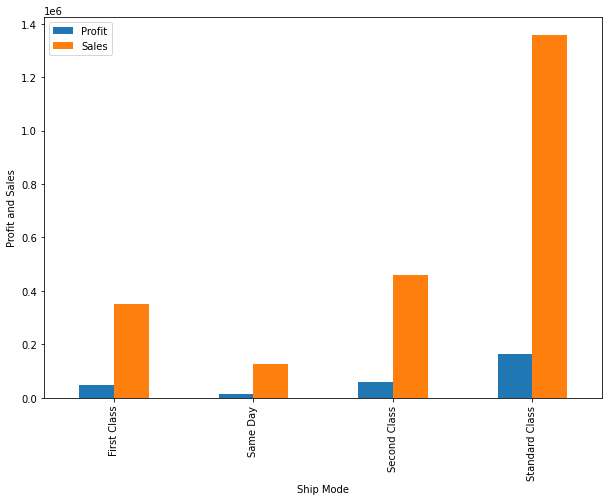

In [25]:
ps.plot(kind="bar",figsize=(10,7))
plt.ylabel("Profit and Sales")

In [26]:
cat=data["Category"].value_counts()
cat

Office Supplies    5986
Furniture          2114
Technology         1844
Name: Category, dtype: int64

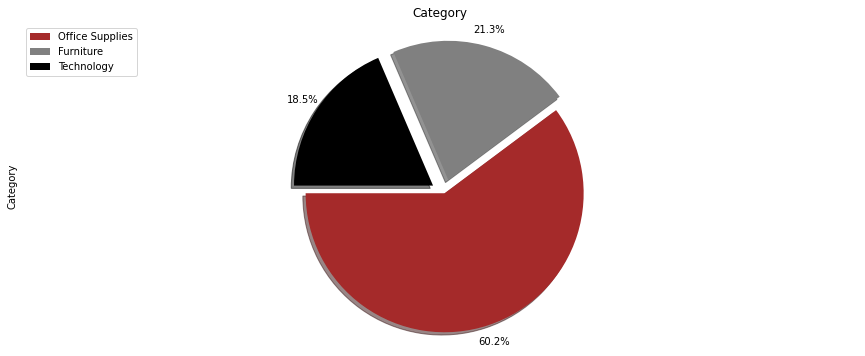

In [27]:
explode_list=[0,0.1,0.1]
colors_list=["brown","gray","black"]
cat.plot(kind="pie",figsize=(15,6),autopct="%1.1f%%",shadow=True,startangle=180,explode=explode_list,labels=None,pctdistance=1.12,colors=colors_list)
plt.title("Category")
plt.axis("equal")
plt.legend(labels=cat.index,loc="upper left")

In [28]:
subc = data["Sub-Category"].value_counts()
subc

Binders        1518
Paper          1344
Furnishings     954
Phones          888
Storage         845
Art             793
Accessories     773
Chairs          615
Appliances      466
Labels          359
Tables          319
Envelopes       254
Bookcases       226
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

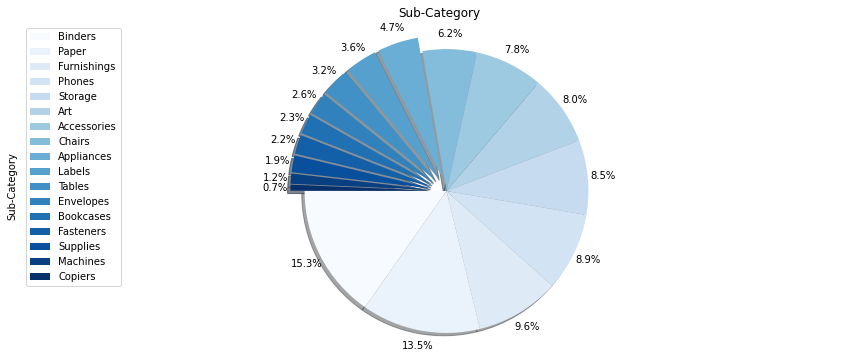

In [29]:
from matplotlib import cm
cmap = cm.get_cmap('Blues')
explode_list=[0,0,0,0,0,0,0,0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
subc.plot(kind="pie",figsize=(15,6),autopct="%1.1f%%",shadow=True,startangle=180,explode=explode_list,labels=None,pctdistance=1.11,cmap=cmap)
plt.title("Sub-Category")
plt.axis("equal")
plt.legend(labels=subc.index,loc="upper left")

Text(0, 0.5, 'Profits')

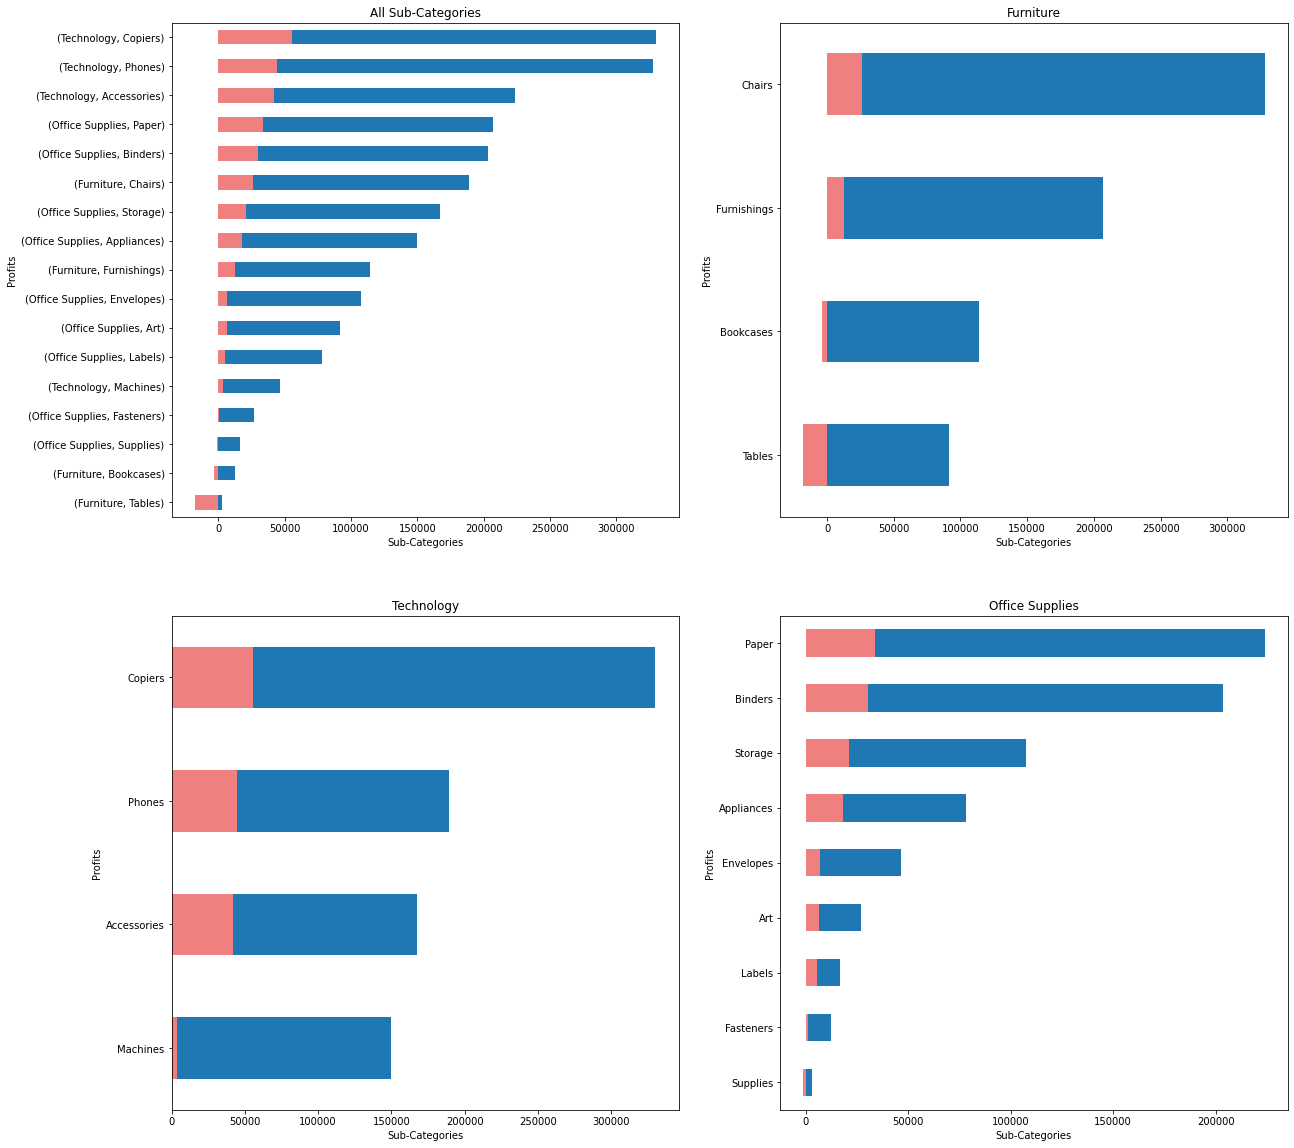

In [30]:
x = data.groupby(["Category","Sub-Category"]).Sales.sum()
y = data.groupby(["Category","Sub-Category"]).Profit.sum()

fig=plt.figure()
ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

x["Furniture"].sort_values(ascending=True).plot(kind="barh",figsize=(20,20),ax=ax1)
ax1.set_title("Furniture")
ax1.set_xlabel("Sub-Categories")
ax1.set_ylabel("Sales")

x["Technology"].sort_values(ascending=True).plot(kind="barh",figsize=(20,20),ax=ax2)
ax2.set_title("Technology")
ax2.set_xlabel("Sub-Categories")
ax2.set_ylabel("Sales")

x["Office Supplies"].sort_values(ascending=True).plot(kind="barh",figsize=(20,20),ax=ax3)
ax3.set_title("Office Supplies")
ax3.set_xlabel("Sub-Categories")
ax3.set_ylabel("Sales")

x.sort_values(ascending=True).plot(kind="barh",figsize=(20,20),ax=ax0)
ax0.set_title("All Sub-Categories")
ax0.set_xlabel("Sub-Categories")
ax0.set_ylabel("Sales")

y["Furniture"].sort_values(ascending=True).plot(kind="barh",figsize=(20,20),ax=ax1,color="lightcoral")
ax1.set_title("Furniture")
ax1.set_xlabel("Sub-Categories")
ax1.set_ylabel("Profits")

y["Technology"].sort_values(ascending=True).plot(kind="barh",figsize=(20,20),ax=ax2,color="lightcoral")
ax2.set_title("Technology")
ax2.set_xlabel("Sub-Categories")
ax2.set_ylabel("Profits")

y["Office Supplies"].sort_values(ascending=True).plot(kind="barh",figsize=(20,20),ax=ax3,color="lightcoral")
ax3.set_title("Office Supplies")
ax3.set_xlabel("Sub-Categories")
ax3.set_ylabel("Profits")

y.sort_values(ascending=True).plot(kind="barh",figsize=(20,20),ax=ax0,color="lightcoral")
ax0.set_title("All Sub-Categories")
ax0.set_xlabel("Sub-Categories")
ax0.set_ylabel("Profits")


Text(0, 0.5, 'Profit')

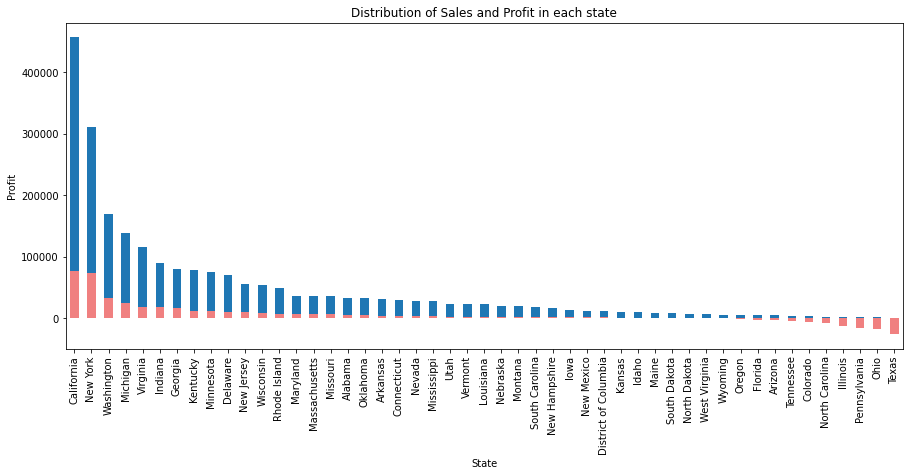

In [31]:
s = data.groupby(["State"]).Sales.sum()
p = data.groupby(["State"]).Profit.sum()

s.sort_values(ascending=False).plot(kind="bar",figsize=(15,6))
plt.xlabel("States")
plt.ylabel("Sales")


p.sort_values(ascending=False).sort_values(ascending=False).plot(kind="bar",figsize=(15,6),color="lightcoral")
plt.title("Distribution of Sales and Profit in each state")
plt.xlabel("State")
plt.ylabel("Profit")

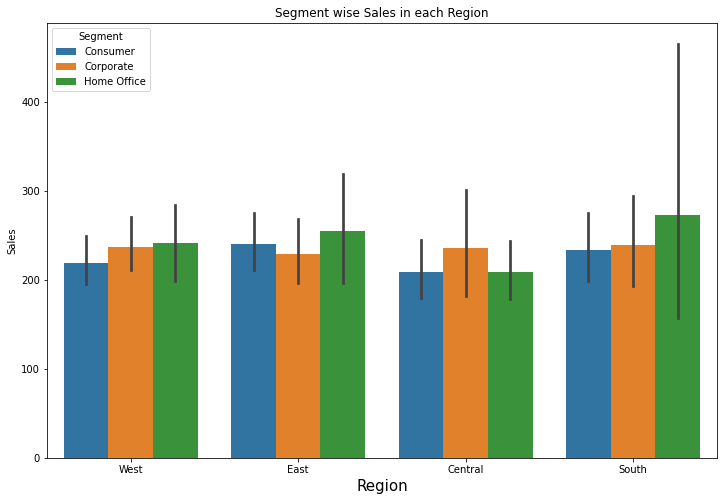

In [32]:
plt.figure(figsize=(12,8))
plt.title("Segment wise Sales in each Region")
sns.barplot(x="Region",y="Sales",data=data,hue="Segment",order=data["Region"].value_counts().index)
plt.xlabel("Region",fontsize=15)
plt.show()

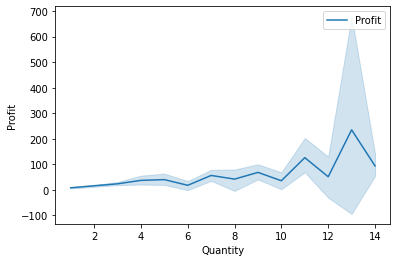

In [33]:
sns.lineplot(x="Quantity",y="Profit",label="Profit",data=data)